In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

In [80]:
data = pd.read_csv('Clean_Dataset.csv')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   days_left       300261 non-null  int64  
 1   airline         300261 non-null  object 
 2   from            300261 non-null  object 
 3   time_taken      300261 non-null  float64
 4   stop            300261 non-null  object 
 5   to              300261 non-null  object 
 6   price           300261 non-null  int64  
 7   class           300261 non-null  object 
 8   departure_time  300261 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


In [82]:
data.head()

days_left    airline   from  time_taken  stop      to  price     class  \
0          1  Air India  Delhi        2.00  zero  Mumbai  25612  business   
1          1  Air India  Delhi        2.25  zero  Mumbai  25612  business   
2          1  Air India  Delhi       24.75   one  Mumbai  42220  business   
3          1  Air India  Delhi       26.50   one  Mumbai  44450  business   
4          1  Air India  Delhi        6.67   one  Mumbai  46690  business   

  departure_time  
0        Evening  
1        Evening  
2        Evening  
3          Night  
4        Evening

In [84]:
len(data)

300261

In [85]:
data['airline'].value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

In [86]:
len(data['airline'].unique())

8

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'Vistara'),
  Text(2, 0, 'SpiceJet'),
  Text(3, 0, 'AirAsia'),
  Text(4, 0, 'GO FIRST'),
  Text(5, 0, 'Indigo'),
  Text(6, 0, 'Trujet'),
  Text(7, 0, 'StarAir')])

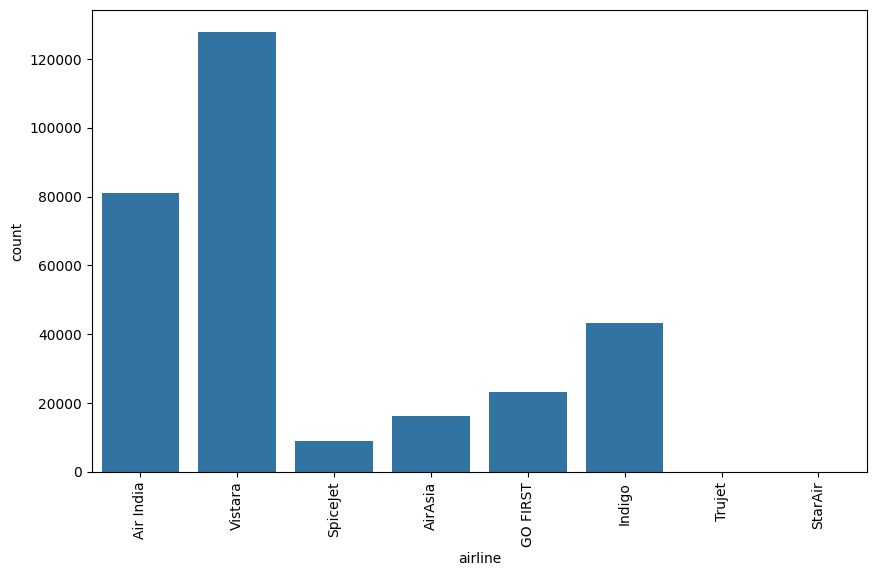

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data , x=data['airline']);
plt.xticks(rotation=90)

In [88]:
# List of airlines to exclude
excluded_airlines = ['Trujet', 'StarAir', 'SpiceJet', 'AirAsia']

# Filter out rows where 'airline' is in the excluded list
data = data[~data['airline'].isin(excluded_airlines)]


In [89]:
len(data['from'].unique())

6

In [90]:
len(data['to'].unique())

6

In [91]:
data['from'].value_counts()

from
Mumbai       56986
Delhi        54434
Bangalore    47445
Kolkata      41571
Hyderabad    38631
Chennai      35983
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Chennai')])

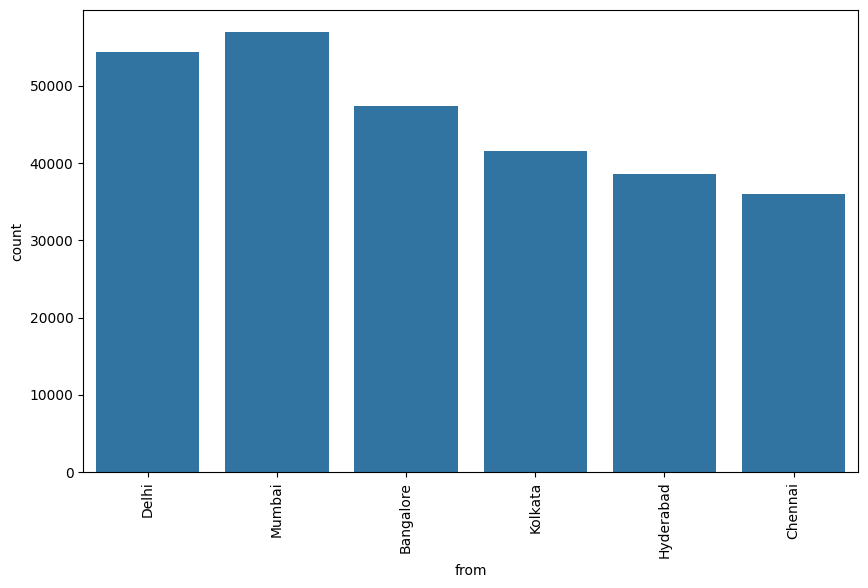

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data , x=data['from'])
plt.xticks(rotation=90)

In [93]:
data['departure_time'].unique()

array(['Evening', 'Night', 'Afternoon', 'Morning', 'Early_Morning',
       'Late_Night'], dtype=object)

In [94]:
data['class'].value_counts()

class
economy     181563
business     93487
Name: count, dtype: int64

In [20]:
data['days_left'].value_counts()

days_left
25    6086
39    6047
32    6039
18    6017
26    6008
24    5984
41    5979
19    5971
33    5968
40    5967
28    5967
31    5965
22    5958
36    5955
20    5953
42    5943
30    5941
38    5939
43    5937
21    5924
37    5917
44    5899
29    5872
34    5866
23    5855
11    5842
27    5818
13    5818
17    5813
45    5791
12    5773
15    5768
14    5752
35    5747
16    5674
46    5639
49    5627
48    5552
47    5538
10    5380
8     5377
6     5351
7     5325
9     5268
5     5043
4     4722
3     3952
2     3742
1     1775
Name: count, dtype: int64

<Axes: ylabel='price'>

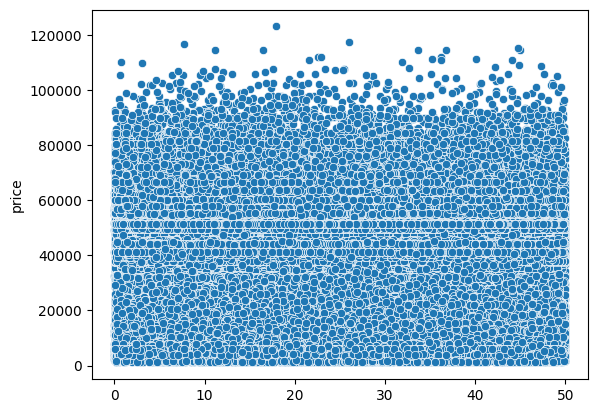

In [95]:
# Generate random values for the x-axis
x_random = np.random.rand(len(data)) * 50

# Create the scatter plot with the filtered data
sns.scatterplot(x=x_random, y=data['price'])

In [96]:
data['price_zscore'] = sc.stats.zscore(data['price'])

C:\Users\SAMI\AppData\Local\Temp\ipykernel_22364\3949183465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_zscore'] = sc.stats.zscore(data['price'])


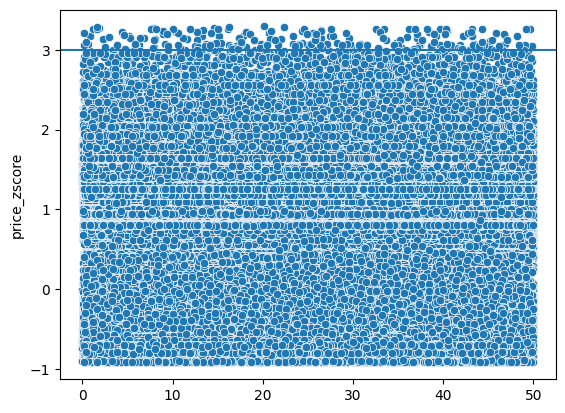

In [100]:
sns.scatterplot(data=data , y='price_zscore' , x=np.random.rand(len(data))*50)
plt.axhline(3)

In [101]:
data = data[(data['price_zscore'] <= 3)]

<Axes: ylabel='price'>

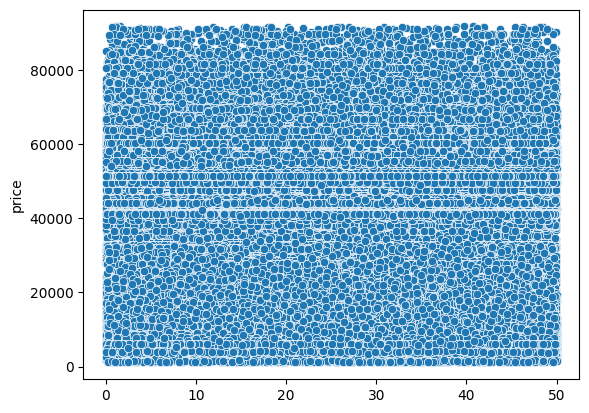

In [102]:
# Generate random values for the x-axis
x_random = np.random.rand(len(data)) * 50
sns.scatterplot(x=x_random, y=data['price'])

In [103]:
data = data.drop('price_zscore', axis=1)

In [105]:
data['stop'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [106]:
data_obj = data.select_dtypes(include='object')

In [107]:
data_obj

airline     from  stop         to     class departure_time
0       Air India    Delhi  zero     Mumbai  business        Evening
1       Air India    Delhi  zero     Mumbai  business        Evening
2       Air India    Delhi   one     Mumbai  business        Evening
3       Air India    Delhi   one     Mumbai  business          Night
4       Air India    Delhi   one     Mumbai  business        Evening
...           ...      ...   ...        ...       ...            ...
300256    Vistara  Chennai   one  Hyderabad   economy        Morning
300257    Vistara  Chennai   one  Hyderabad   economy        Morning
300258    Vistara  Chennai   one  Hyderabad   economy      Afternoon
300259    Vistara  Chennai   one  Hyderabad   economy        Morning
300260    Vistara  Chennai   one  Hyderabad   economy        Evening

[274713 rows x 6 columns]

In [108]:
data_obj = pd.get_dummies(data_obj)

In [109]:
data_obj

airline_Air India  airline_GO FIRST  airline_Indigo  airline_Vistara  \
0                    True             False           False            False   
1                    True             False           False            False   
2                    True             False           False            False   
3                    True             False           False            False   
4                    True             False           False            False   
...                   ...               ...             ...              ...   
300256              False             False           False             True   
300257              False             False           False             True   
300258              False             False           False             True   
300259              False             False           False             True   
300260              False             False           False             True   

        from_Bangalore  from_Chennai  from_Delhi  from_Hyderabad  \
0                False         False        True           False   
1                False         False        True           False   
2                False         False        True           False   
3                False         False        True           False   
4                False         False        True           False   
...                ...           ...         ...             ...   
300256           False          True       False           False   
300257           False          True       False           False   
300258           False          True       False           False   
300259           False          True       False           False   
300260           False          True       False           False   

        from_Kolkata  from_Mumbai  ...  to_Kolkata  to_Mumbai  class_business  \
0              False        False  ...       False       True            True   
1              False        False  ...       False       True            True   
2              False        False  ...       False       True            True   
3              False        False  ...       False       True            True   
4              False        False  ...       False       True            True   
...              ...          ...  ...         ...        ...             ...   
300256         False        False  ...       False      False           False   
300257         False        False  ...       False      False           False   
300258         False        False  ...       False      False           False   
300259         False        False  ...       False      False           False   
300260         False        False  ...       False      False           False   

        class_economy  departure_time_Afternoon  departure_time_Early_Morning  \
0               False                     False                         False   
1               False                     False                         False   
2               False                     False                         False   
3               False                     False                         False   
4               False                     False                         False   
...               ...                       ...                           ...   
300256           True                     False                         False   
300257           True                     False                         False   
300258           True                      True                         False   
300259           True                     False                         False   
300260           True                     False                         False   

        departure_time_Evening  departure_time_Late_Night  \
0                         True                      False   
1                         True                      False   
2                         True                      False   
3                        False          

In [110]:
data_num = data.select_dtypes(exclude='object')

In [111]:
data_num

days_left  time_taken  price
0               1        2.00  25612
1               1        2.25  25612
2               1       24.75  42220
3               1       26.50  44450
4               1        6.67  46690
...           ...         ...    ...
300256         49       13.83   7697
300257         49       13.83   7709
300258         49       20.58   8640
300259         49       23.33   8640
300260         49       24.42   8640

[274713 rows x 3 columns]

In [112]:
final_df = pd.concat([data_num,data_obj],axis=1)

In [113]:
final_df

days_left  time_taken  price  airline_Air India  airline_GO FIRST  \
0               1        2.00  25612               True             False   
1               1        2.25  25612               True             False   
2               1       24.75  42220               True             False   
3               1       26.50  44450               True             False   
4               1        6.67  46690               True             False   
...           ...         ...    ...                ...               ...   
300256         49       13.83   7697              False             False   
300257         49       13.83   7709              False             False   
300258         49       20.58   8640              False             False   
300259         49       23.33   8640              False             False   
300260         49       24.42   8640              False             False   

        airline_Indigo  airline_Vistara  from_Bangalore  from_Chennai  \
0                False            False           False         False   
1                False            False           False         False   
2                False            False           False         False   
3                False            False           False         False   
4                False            False           False         False   
...                ...              ...             ...           ...   
300256           False             True           False          True   
300257           False             True           False          True   
300258           False             True           False          True   
300259           False             True           False          True   
300260           False             True           False          True   

        from_Delhi  ...  to_Kolkata  to_Mumbai  class_business  class_economy  \
0             True  ...       False       True            True          False   
1             True  ...       False       True            True          False   
2             True  ...       False       True            True          False   
3             True  ...       False       True            True          False   
4             True  ...       False       True            True          False   
...            ...  ...         ...        ...             ...            ...   
300256       False  ...       False      False           False           True   
300257       False  ...       False      False           False           True   
300258       False  ...       False      False           False           True   
300259       False  ...       False      False           False           True   
300260       False  ...       False      False           False           True   

        departure_time_Afternoon  departure_time_Early_Morning  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   
...                          ...                           ...   
300256                     False                         False   
300257                     False                         False   
300258                      True                         False   
300259                     False                         False   
300260                     False                         False   

        departure_time_Evening  departure_time_Late_Night  \
0                         True                      False   
1                         True                      False   
2                         True                      False   
3                        False                      False   
4                         True                      False   
...                        ...                        ...   
300256       

In [114]:
final_df['price'].max()

91756

In [115]:
final_df['price'].min()

1105

<Axes: >

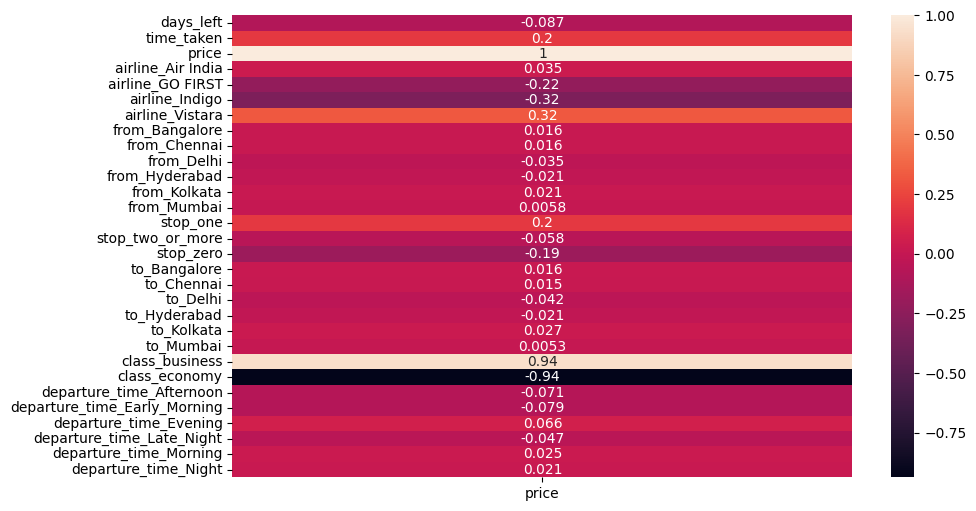

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=final_df.corr()[['price']] ,annot=True)

<Axes: >

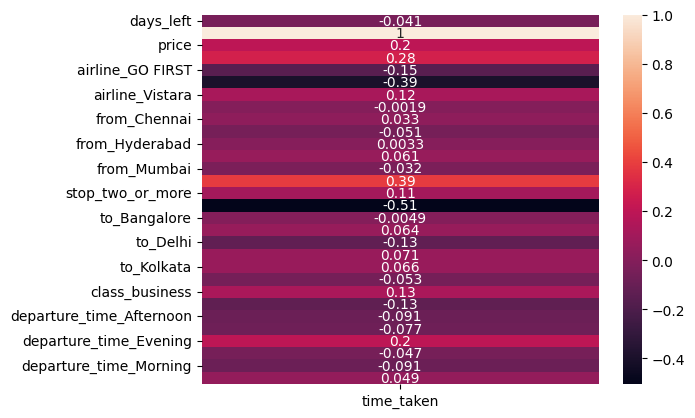

In [118]:
sns.heatmap(data=final_df.corr()[['time_taken']] ,annot=True)

In [119]:
final_df.to_csv("./flight_data_final.csv",index=False)